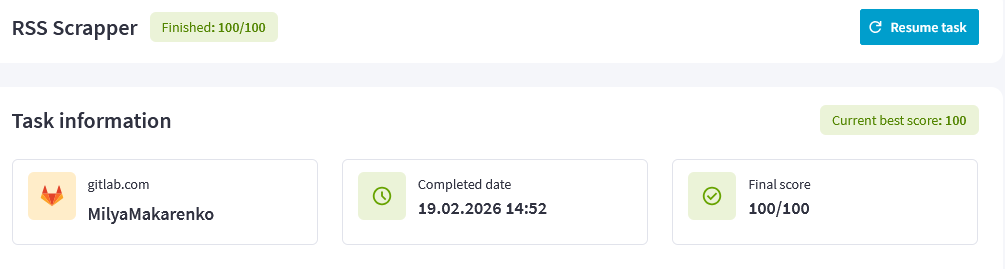

# Scrapper

### Common Requirements

- Code must correspond to **pep8** (use **pycodestyle** utility for self-check).
    - You can set line lengths up to 120 symbols.

### Task Description

For this task, you can join with an RSS reader using **Python 3.10.**

For the testing, you are going to isolate the parts you will work on. Namely, you are going to work only on the RSS (XML) scrapping part. Your task is to parse the RSS document and provide two formatted outputs: JSON and the standard output.

You are going to:

    - Command line parsing.
    - Receive the XML document from the web.

Because you can create your own style of formatting, it will be difficult to test you. So, we will provide you with the exact style for the format to ease the testing part.

The format of the RSS feed that you are going to parse is RSS 2.0. You can follow the link to get a full understanding of the specification. But in this task, we are asking for the following requirements:

```
<channel>...</channel> <!-- Required tags are <title>, <link>, <description>  but we are asking you to be able to parse <title>, <link>, <description>, <category>, <language>, <lastBuildDate>, <managingEditor>, <pubDate>, <item> -->
<item>...</item> <!-- All of the fields here are optional, but each item should have at least <title> or <description>, but for the purposes of the test we are asking to be able to parse <title>, <author>, <pubDate>, <link>, <category>, <description> -->
```

The order of the RSS items in all the output types should be the following:

    - For <channel> element:
        <title>
        <link>
        <lastBuildDate>
        <pubDate>
        <language>
        <category> for category in categories
        <managinEditor>
        <description>
        <item> for item in items
    - For <item> element:
        <title>
        <author>
        <pubDate>
        <link>
        <category>
        <description>

The CLI is going to have the following interface. You can use it for testing purposes when you develop XML document parsing.

```
usage: rss_reader.py [-h] [--json] [--limit LIMIT]
                    source

Pure Python command-line RSS reader.

positional arguments:
 source         RSS URL

optional arguments:
 -h, --help     show this help message and exit
 --json         Print result as JSON in stdout
 --limit LIMIT  Limit news topics if this parameter is provided
 ```

### Command Line Arguments

    1. If the limit is not specified, then the user should get all available feeds.
    2. If the limit is larger than the feed size, then the user should get all available news.
    3. The limit argument should also affect JSON generation
    4. In the case of using the --json argument, your utility should convert the news into the JSON format.

### Console Output:

    - For <channel> element:
        <title> is equal to Feed
        <link> is equal to Link
        <lastBuildDate> is equal to Last Build Date
        <pubDate> is equal to Publish Date
        <language> is equal to Language
        <category> for category in categories is equal to Categories: category1, category2
        <managinEditor> is equal to Editor
        <description> is equal to Description
        <item> for item in items each item is separated by a custom separator, and all items within except for the description are stuck together.
    - For <item> element:
        <title> is equal to Title
        <author> is equal to Author
        <pubDate> is equal to Published
        <link> is equal to Link
        <category> is equal to Categories: category1, category2
        <description> is on a separate line without any name.

For the console output you are looking for the order of things – channel items go first and then the other items. You should also have a space between the channel elements and items. Also, the description within the item should be on the new line, separated by space. For example:

```
Feed: Yahoo News - Latest News & Headlines
Link: https://news.yahoo.com/rss
Description: Yahoo news description

Title: Nestor heads into Georgia after tornados damage Florida
Published: Sun, 20 Oct 2019 04:21:44 +0300
Link: https://news.yahoo.com/wet-weekend-tropical-storm-warnings-131131925.html

Nestor raced across Georgia as a post-tropical cyclone late Saturday, hours after the former tropical storm spawned a tornado that damaged homes and a school in central Florida while sparing areas of the Florida Panhandle devastated one year earlier by Hurricane Michael. The storm made landfall Saturday on St. Vincent Island, a nature preserve off Florida's northern Gulf Coast in a lightly populated area of the state, the National Hurricane Center said. Nestor was expected to bring 1 to 3 inches of rain to drought-stricken inland areas on its march across a swath of the U.S. Southeast... <--- !!! THIS IS DESCRIPTION !!!

Title: Some Other Title
Published: Sun, 20 Oct 2019 04:21:44 +0300
Link: https://some.other.link/some-other-news


Some other new cool information. <--- !!! THIS IS DESCRIPTION
```

### JSON Output:

For the JSON output, you are looking for the exact names of the tags. Ask for the pretty output:

```
{
  "title": "Yahoo News - Latest News & Headlines",
  "link": "https://news.yahoo.com/rss",
  "description": "Yahoo news description",
  "items": [
    {
      "title": "Nestor heads into Georgia after tornados damage Florida",
      "pubDate": "Sun, 20 Oct 2019 04:21:44 +0300",
      "link": "https://some.other.link/some-other-news",
      "description": "Nestor raced across Georgia as a post-tropical cyclone late Saturday, hours after the former tropical storm spawned a tornado that damaged homes and a school in central Florida while sparing areas of the Florida Panhandle devastated one year earlier by Hurricane Michael. The storm made landfall Saturday on St. Vincent Island, a nature preserve off Florida's northern Gulf Coast in a lightly populated area of the state, the National Hurricane Center said. Nestor was expected to bring 1 to 3 inches of rain to drought-stricken inland areas on its march across a swath of the U.S. Southeast..."
    },
    {
      "title": "Some other title",
      "pubDate": "Sun, 20 Oct 2019 04:21:44 +0300",
      "link": "https://some.other.link/some-other-news",
      "description": "Some other new cool information."
    }
  ]
}
```

You should have an indent to be equal to two spaces.

        - Ensure that your app has no encoding issues (meaning symbols like &#39, etc.) when printing news to stdout.
        - Ensure that your app has no encoding issues (meaning symbols like &#39, etc.) when printing news to stdout in JSON format.
        - The limit argument should also affect JSON generation. *It is preferable to have different custom exceptions for different situations (if needed).

        -----------------------------------------------------------------------------------------------------------------------------------------------------

### Implementations will be checked with the latest CPython interpreter of the 3.10 branch.

    Always code as if the guy who ends up maintaining your code will be a violent psychopath who knows where you live. Code for readability. John F. Woods


In [ ]:
from argparse import ArgumentParser
from typing import List, Optional, Sequence
import requests
import xml.etree.ElementTree as ET
import json as json_module
import html


class UnhandledException(Exception):
    # наследуется потом
    pass


def rss_parser(
    xml: str,
    limit: Optional[int] = None,
    json: bool = False,
) -> List[str]:
    """
    RSS parser.

    Args:
        xml: XML document as a string.
        limit: Number of the news to return. if None, returns all news.
        json: If True, format output as JSON.

    Returns:
        List of strings.
        Which then can be printed to stdout or written to file as a separate lines.

    Examples:
        >>> xml = '<rss><channel><title>Some RSS Channel</title><link>https://some.rss.com</link><description>Some RSS Channel</description></channel></rss>'
        >>> rss_parser(xml)
        ["Feed: Some RSS Channel",
        "Link: https://some.rss.com"]
        >>> print("\\n".join(rss_parser(xmls)))
        Feed: Some RSS Channel
        Link: https://some.rss.com
    """
    # Your code goes here
    # парсим XML
    root = ET.fromstring(xml)
    channel = root.find('channel')

    if channel is None:
        return []
    
    # извлекаем данные канала
    result = []
    channel_data = {}
    items_data = []

    # парсим channel
    channel_data['title'] = _get_elem_text(channel, 'title')
    channel_data['link'] = _get_elem_text(channel, 'link')
    channel_data['lastBuildDate'] = _get_elem_text(channel, 'lastBuildDate')
    channel_data['pubDate'] = _get_elem_text(channel, 'pubDate')
    channel_data['language'] = _get_elem_text(channel, 'language')
    channel_data['description'] = _get_elem_text(channel, 'description')
    channel_data['managingEditor'] = _get_elem_text(channel, 'managingEditor')


    # парсим категории канала
    categories = []
    for cat_elem in channel.findall('category'):
        if cat_elem.text:
            categories.append(_clean_text(cat_elem.text.strip()))
    if categories:  # сохраняем только если есть категории
        channel_data['categories'] = categories        



    # парсим items
    for i, item_elem in enumerate(channel.findall('item')):
        if limit is not None and i >= limit:
            break
            
        item = {}
        item['title'] = _get_elem_text(item_elem, 'title')
        item['author'] = _get_elem_text(item_elem, 'author')
        item['pubDate'] = _get_elem_text(item_elem, 'pubDate')
        item['link'] = _get_elem_text(item_elem, 'link')
        item['description'] = _get_elem_text(item_elem, 'description')
        
        # парсим категории item
        item_categories = []
        for cat_elem in item_elem.findall('category'):
            if cat_elem.text:
                item_categories.append(_clean_text(cat_elem.text.strip()))
        
        if item_categories:  # сохраняем только если есть категории
            item['categories'] = item_categories

        
        # Добавляем item только если у него есть хоть одно поле
        if item: 
            items_data.append(item)

    # форматируем вывод
    if json:
        # JSON формат
        json_output = {}
        
        #добавляем поля channel только если они есть
        if channel_data.get('title'):
            json_output['title'] = _clean_text(channel_data['title'])
        if channel_data.get('link'):
            json_output['link'] = _clean_text(channel_data['link'])
        if channel_data.get('description'):
            json_output['description'] = _clean_text(channel_data['description'])
        if channel_data.get('language'):
            json_output['language'] = _clean_text(channel_data['language'])
        if channel_data.get('lastBuildDate'):
            json_output['lastBuildDate'] = _clean_text(channel_data['lastBuildDate'])
        if channel_data.get('pubDate'):
            json_output['pubDate'] = _clean_text(channel_data['pubDate'])
        if channel_data.get('managingEditor'):
            json_output['managingEditor'] = _clean_text(channel_data['managingEditor'])
        if channel_data.get('categories'): 
            json_output['category'] = channel_data['categories']

        # Добавляем items толко если  есть
        if items_data:  
            items_list = []
            for item in items_data:
                json_item = {}
                if item.get('title'):
                    json_item['title'] = _clean_text(item['title'])
                if item.get('author'):
                    json_item['author'] = _clean_text(item['author'])
                if item.get('pubDate'):
                    json_item['pubDate'] = _clean_text(item['pubDate'])
                if item.get('link'):
                    json_item['link'] = _clean_text(item['link'])
                if item.get('description'):
                    json_item['description'] = _clean_text(item['description'])
                if item.get('categories'):
                    json_item['category'] = item['categories']
                items_list.append(json_item)
            
            json_output['items'] = items_list  

        # Форматируем JSON с отступом 2 пробела
        result.append(json_module.dumps(json_output, indent=2, ensure_ascii=False))
        
    else:
        # консольный формат
        # Channel info
        if channel_data.get('title'):
            result.append(f"Feed: {_clean_text(channel_data['title'])}")
        if channel_data.get('link'):
            result.append(f"Link: {_clean_text(channel_data['link'])}")
        if channel_data.get('lastBuildDate'):
            result.append(f"Last Build Date: {_clean_text(channel_data['lastBuildDate'])}")
        if channel_data.get('pubDate'):
            result.append(f"Publish Date: {_clean_text(channel_data['pubDate'])}")
        if channel_data.get('language'):
            result.append(f"Language: {_clean_text(channel_data['language'])}")
        if channel_data.get('categories'):
            cats = ', '.join(channel_data['categories'])
            result.append(f"Categories: {cats}")
        if channel_data.get('managingEditor'):
            result.append(f"Editor: {_clean_text(channel_data['managingEditor'])}")
        if channel_data.get('description'):
            result.append(f"Description: {_clean_text(channel_data['description'])}")
        
        # Items
        for item in items_data:
            result.append("")  # Пустая строка между элементами
            
            if item.get('title'):
                result.append(f"Title: {_clean_text(item['title'])}")
            if item.get('author'):
                result.append(f"Author: {_clean_text(item['author'])}")
            if item.get('pubDate'):
                result.append(f"Published: {_clean_text(item['pubDate'])}")
            if item.get('link'):
                result.append(f"Link: {_clean_text(item['link'])}")
            if item.get('categories'):
                cats = ', '.join(item['categories'])
                result.append(f"Categories: {cats}")
            if item.get('description'):
                result.append("")  # Пустая строка перед описанием
                result.append(_clean_text(item['description']))
    
    return result

def _get_elem_text(parent: ET.Element, tag: str) -> Optional[str]:
    """Get text from element if exists."""
    elem = parent.find(tag)
    if elem is not None and elem.text:
        return elem.text.strip()
    return None


def _clean_text(text: Optional[str]) -> str:
    """Clean HTML entities from text."""
    if text is None:
        return ""
    return html.unescape(text)


def main(argv: Optional[Sequence] = None):
    """
    The main function of your task.
    """
    parser = ArgumentParser(
        prog="rss_reader",
        description="Pure Python command-line RSS reader.",
    )
    parser.add_argument("source", help="RSS URL", type=str, nargs="?")
    parser.add_argument(
        "--json", help="Print result as JSON in stdout", action="store_true"
    )
    parser.add_argument(
        "--limit", help="Limit news topics if this parameter provided", type=int
    )

    args = parser.parse_args(argv)
    xml = requests.get(args.source).text
    try:
        output_lines = rss_parser(xml, args.limit, args.json)
    
        # Для JSON выводим как есть (одна строка с отформатированным JSON)
        if args.json:
            print(output_lines[0] if output_lines else "")
        else:
            # Для консоли объединяем с переносами строк
            print("\n".join(output_lines))
        return 0
        
    except Exception as e:
        raise UnhandledException(e)



if __name__ == "__main__":
    main()